# Titanic EDA

初期のデータ探索と分析

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import japanize_matplotlib

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

## データの読み込み

In [11]:
# データの読み込み
train_df = pd.read_csv('../../data/train.csv')
test_df = pd.read_csv('../../data/test.csv')

print(f"訓練データ: {train_df.shape}")
print(f"テストデータ: {test_df.shape}")

訓練データ: (891, 12)
テストデータ: (418, 11)


## データの基本情報

In [12]:
# 訓練データの最初の5行を表示
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
# データ型と欠損値の確認
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [14]:
# 基本統計量
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
# カテゴリカル変数の統計
train_df.describe(include=['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


## 欠損値の確認

In [16]:
# 欠損値の割合を計算
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : '欠損数', 1 : '欠損率(%)'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '欠損率(%)', ascending=False).round(1)
    return mis_val_table_ren_columns

print("訓練データの欠損値")
missing_values_table(train_df)

訓練データの欠損値


,欠損数,欠損率(%)
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2


In [17]:
print("テストデータの欠損値")
missing_values_table(test_df)

テストデータの欠損値


,欠損数,欠損率(%)
Cabin,327,78.2
Age,86,20.6
Fare,1,0.2


## 目的変数の分布

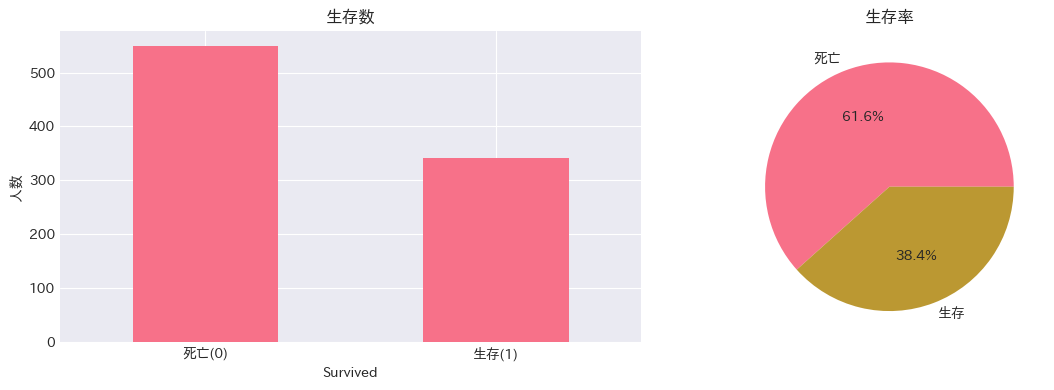

生存率: 38.38%


In [21]:
# 生存率の確認
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
plt.rcParams['font.family'] = 'IPAexGothic'

# 生存/死亡の数
train_df['Survived'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('生存数')
ax[0].set_xticklabels(['死亡(0)', '生存(1)'], rotation=0)
ax[0].set_ylabel('人数')

# 生存率
survival_rate = train_df['Survived'].mean() * 100
ax[1].pie([100-survival_rate, survival_rate],
          labels=['死亡', '生存'],
          autopct='%1.1f%%')
ax[1].set_title('生存率')

plt.tight_layout()
plt.show()

print(f"生存率: {survival_rate:.2f}%")

## カテゴリカル変数と生存率の関係

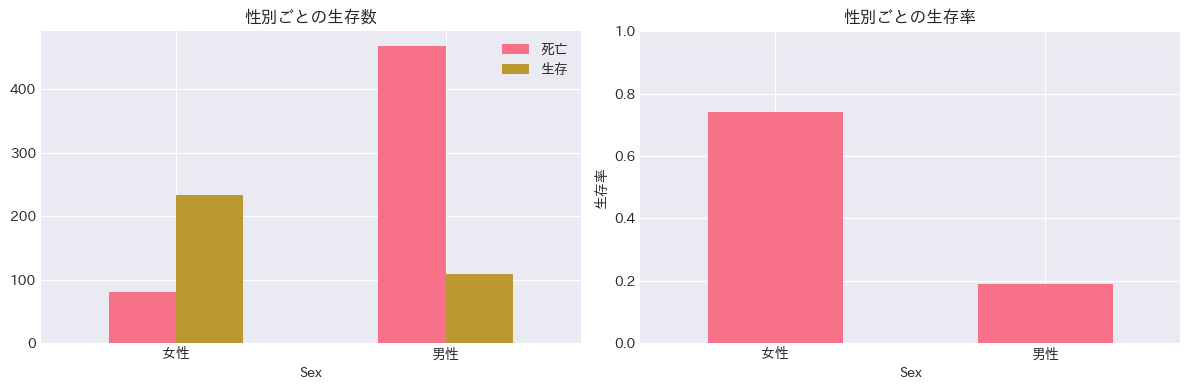

In [22]:
# 性別と生存率
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

train_df.groupby(['Sex', 'Survived']).size().unstack().plot(kind='bar', ax=ax[0])
ax[0].set_title('性別ごとの生存数')
ax[0].set_xticklabels(['女性', '男性'], rotation=0)
ax[0].legend(['死亡', '生存'])

train_df.groupby('Sex')['Survived'].mean().plot(kind='bar', ax=ax[1])
ax[1].set_title('性別ごとの生存率')
ax[1].set_xticklabels(['女性', '男性'], rotation=0)
ax[1].set_ylabel('生存率')
ax[1].set_ylim([0, 1])

plt.tight_layout()
plt.show()

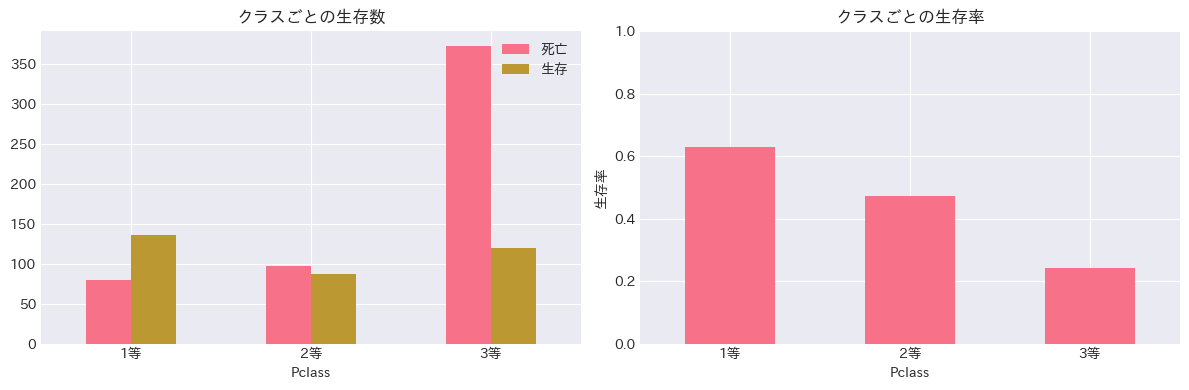

In [23]:
# チケットクラスと生存率
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

train_df.groupby(['Pclass', 'Survived']).size().unstack().plot(kind='bar', ax=ax[0])
ax[0].set_title('クラスごとの生存数')
ax[0].set_xticklabels(['1等', '2等', '3等'], rotation=0)
ax[0].legend(['死亡', '生存'])

train_df.groupby('Pclass')['Survived'].mean().plot(kind='bar', ax=ax[1])
ax[1].set_title('クラスごとの生存率')
ax[1].set_xticklabels(['1等', '2等', '3等'], rotation=0)
ax[1].set_ylabel('生存率')
ax[1].set_ylim([0, 1])

plt.tight_layout()
plt.show()

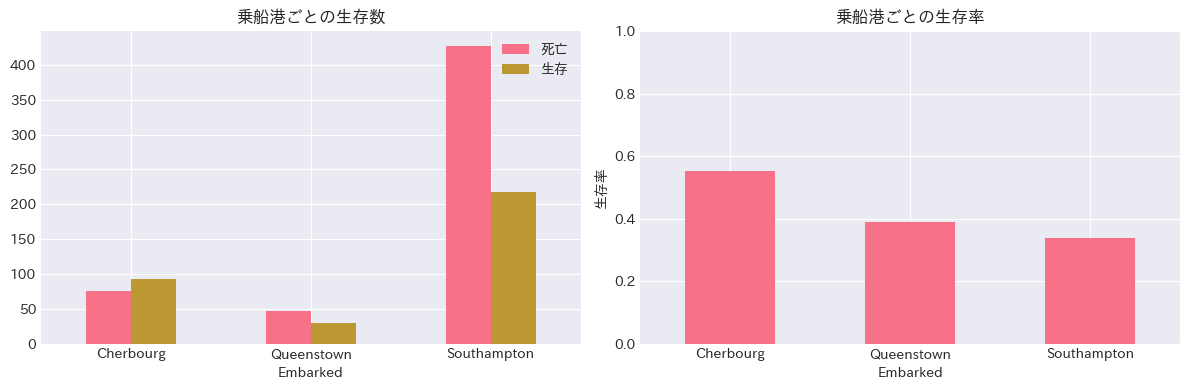

In [24]:
# 乗船港と生存率
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

train_df.groupby(['Embarked', 'Survived']).size().unstack().plot(kind='bar', ax=ax[0])
ax[0].set_title('乗船港ごとの生存数')
ax[0].set_xticklabels(['Cherbourg', 'Queenstown', 'Southampton'], rotation=0)
ax[0].legend(['死亡', '生存'])

train_df.groupby('Embarked')['Survived'].mean().plot(kind='bar', ax=ax[1])
ax[1].set_title('乗船港ごとの生存率')
ax[1].set_xticklabels(['Cherbourg', 'Queenstown', 'Southampton'], rotation=0)
ax[1].set_ylabel('生存率')
ax[1].set_ylim([0, 1])

plt.tight_layout()
plt.show()

## 数値変数と生存率の関係

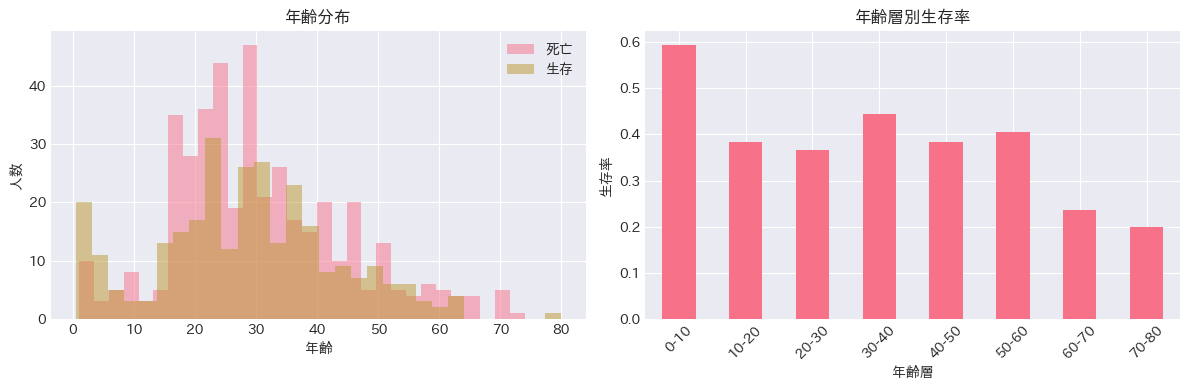

In [25]:
# 年齢分布
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

train_df[train_df['Survived']==0]['Age'].plot.hist(bins=30, alpha=0.5, label='死亡', ax=ax[0])
train_df[train_df['Survived']==1]['Age'].plot.hist(bins=30, alpha=0.5, label='生存', ax=ax[0])
ax[0].set_xlabel('年齢')
ax[0].set_ylabel('人数')
ax[0].legend()
ax[0].set_title('年齢分布')

# 年齢層別生存率
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
train_df['AgeBin'] = pd.cut(train_df['Age'], age_bins)
train_df.groupby('AgeBin')['Survived'].mean().plot(kind='bar', ax=ax[1])
ax[1].set_title('年齢層別生存率')
ax[1].set_xlabel('年齢層')
ax[1].set_ylabel('生存率')
ax[1].set_xticklabels(['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80'], rotation=45)

plt.tight_layout()
plt.show()

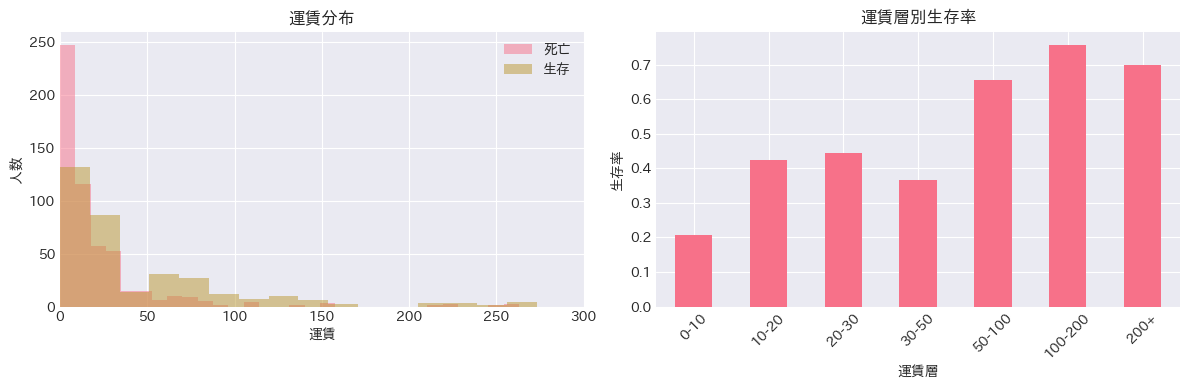

In [26]:
# 運賃と生存率
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

train_df[train_df['Survived']==0]['Fare'].plot.hist(bins=30, alpha=0.5, label='死亡', ax=ax[0])
train_df[train_df['Survived']==1]['Fare'].plot.hist(bins=30, alpha=0.5, label='生存', ax=ax[0])
ax[0].set_xlabel('運賃')
ax[0].set_ylabel('人数')
ax[0].legend()
ax[0].set_title('運賃分布')
ax[0].set_xlim([0, 300])

# 運賃層別生存率
fare_bins = [0, 10, 20, 30, 50, 100, 200, 600]
train_df['FareBin'] = pd.cut(train_df['Fare'], fare_bins)
train_df.groupby('FareBin')['Survived'].mean().plot(kind='bar', ax=ax[1])
ax[1].set_title('運賃層別生存率')
ax[1].set_xlabel('運賃層')
ax[1].set_ylabel('生存率')
ax[1].set_xticklabels(['0-10', '10-20', '20-30', '30-50', '50-100', '100-200', '200+'], rotation=45)

plt.tight_layout()
plt.show()

## 家族構成と生存率

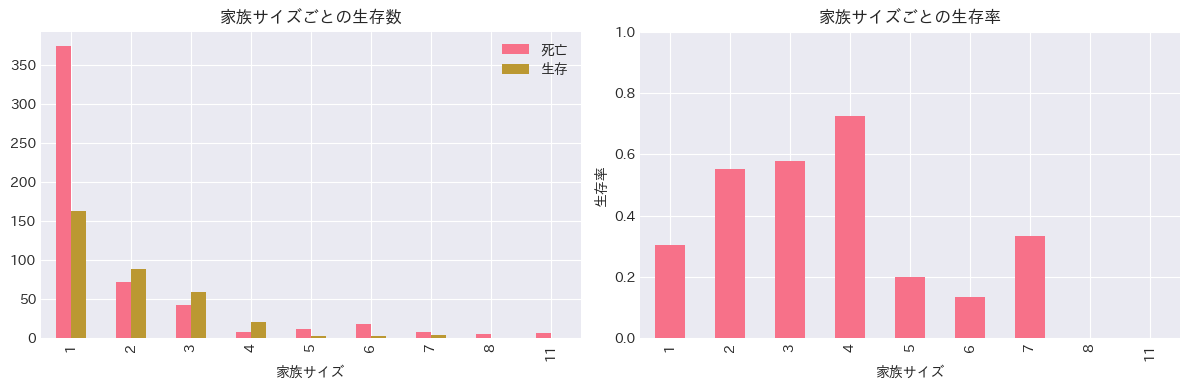

In [27]:
# 家族サイズの作成
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# 家族サイズと生存数
train_df.groupby(['FamilySize', 'Survived']).size().unstack().plot(kind='bar', ax=ax[0])
ax[0].set_title('家族サイズごとの生存数')
ax[0].set_xlabel('家族サイズ')
ax[0].legend(['死亡', '生存'])

# 家族サイズと生存率
train_df.groupby('FamilySize')['Survived'].mean().plot(kind='bar', ax=ax[1])
ax[1].set_title('家族サイズごとの生存率')
ax[1].set_xlabel('家族サイズ')
ax[1].set_ylabel('生存率')
ax[1].set_ylim([0, 1])

plt.tight_layout()
plt.show()

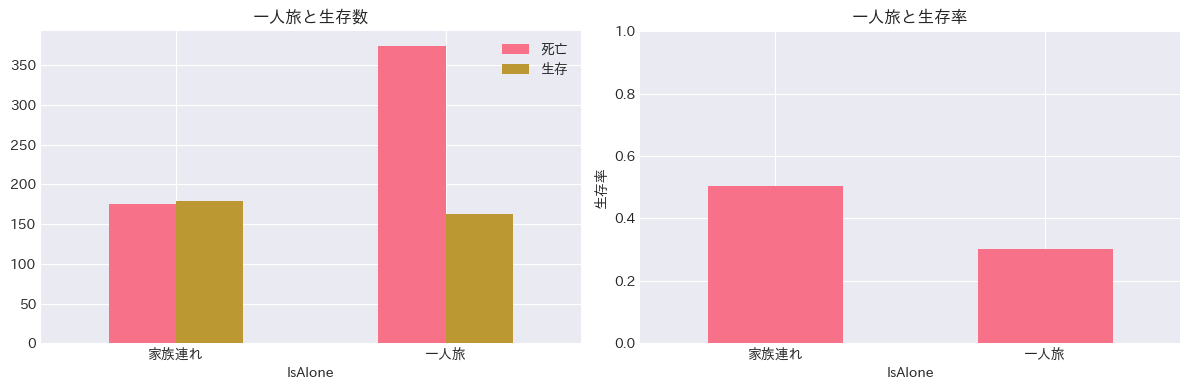

In [28]:
# 一人旅かどうか
train_df['IsAlone'] = (train_df['FamilySize'] == 1).astype(int)

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

train_df.groupby(['IsAlone', 'Survived']).size().unstack().plot(kind='bar', ax=ax[0])
ax[0].set_title('一人旅と生存数')
ax[0].set_xticklabels(['家族連れ', '一人旅'], rotation=0)
ax[0].legend(['死亡', '生存'])

train_df.groupby('IsAlone')['Survived'].mean().plot(kind='bar', ax=ax[1])
ax[1].set_title('一人旅と生存率')
ax[1].set_xticklabels(['家族連れ', '一人旅'], rotation=0)
ax[1].set_ylabel('生存率')
ax[1].set_ylim([0, 1])

plt.tight_layout()
plt.show()

## 複合的な分析

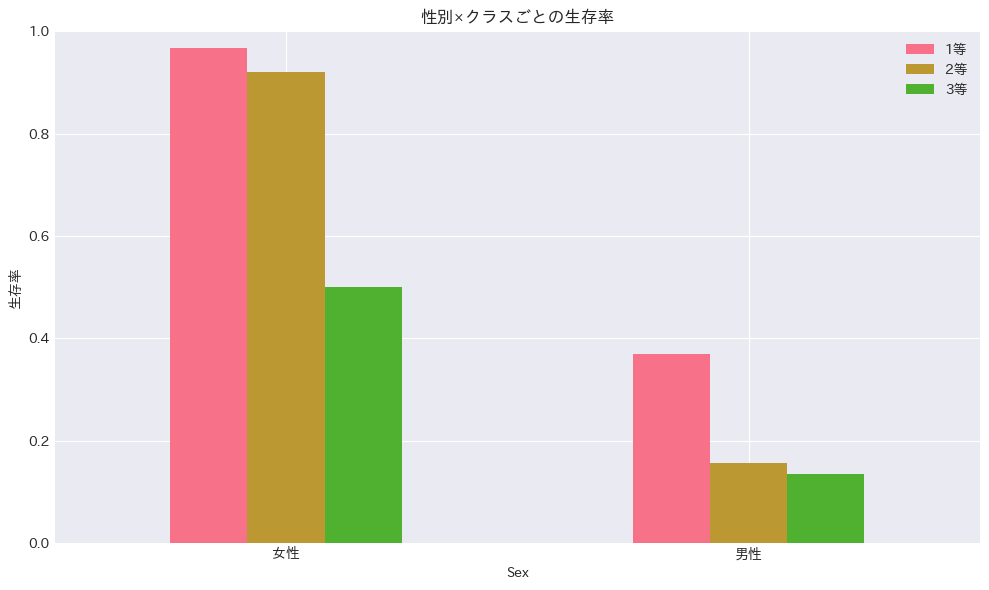

In [29]:
# 性別×クラスと生存率
fig, ax = plt.subplots(figsize=(10, 6))

survival_by_sex_pclass = train_df.groupby(['Sex', 'Pclass'])['Survived'].mean().unstack()
survival_by_sex_pclass.plot(kind='bar', ax=ax)
ax.set_title('性別×クラスごとの生存率')
ax.set_xticklabels(['女性', '男性'], rotation=0)
ax.set_ylabel('生存率')
ax.legend(['1等', '2等', '3等'])
ax.set_ylim([0, 1])

plt.tight_layout()
plt.show()

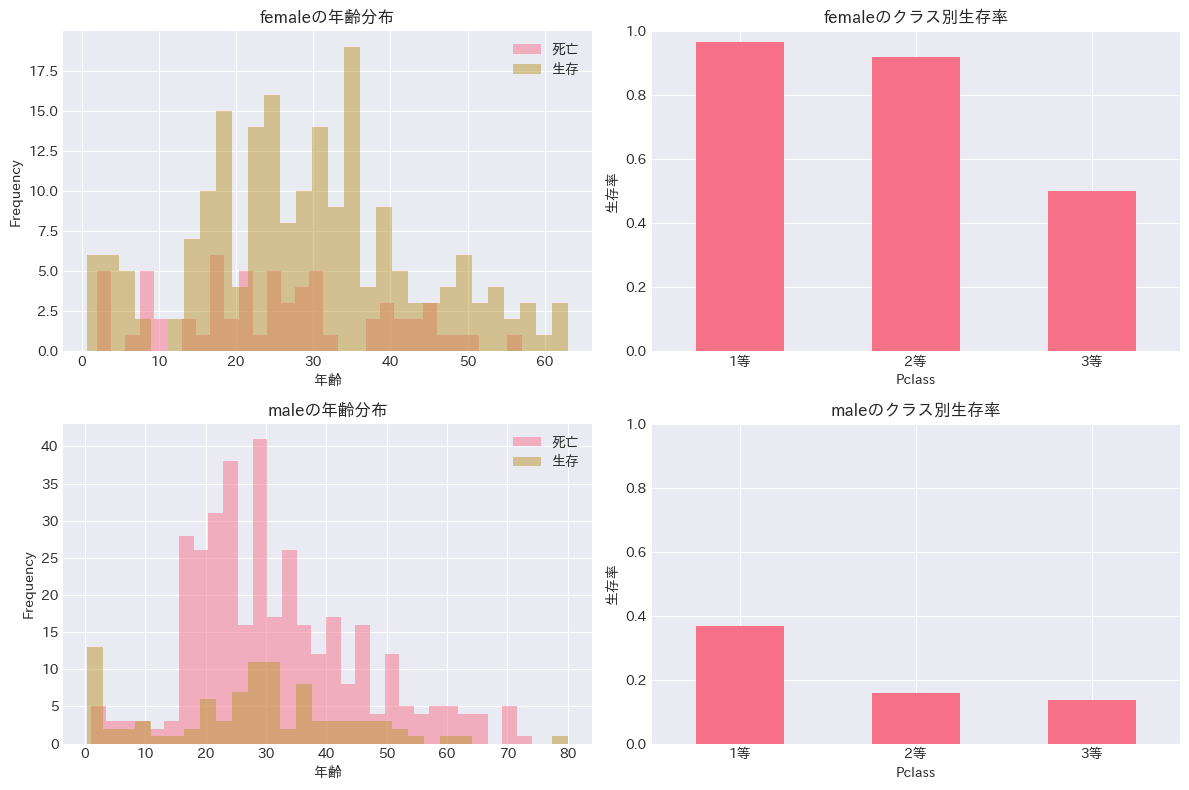

In [30]:
# 年齢×性別の分布
fig, ax = plt.subplots(2, 2, figsize=(12, 8))

for idx, (sex, group) in enumerate(train_df.groupby('Sex')):
    row = idx

    # 生存者と死亡者の年齢分布
    group[group['Survived']==0]['Age'].plot.hist(bins=30, alpha=0.5, label='死亡', ax=ax[row, 0])
    group[group['Survived']==1]['Age'].plot.hist(bins=30, alpha=0.5, label='生存', ax=ax[row, 0])
    ax[row, 0].set_title(f'{sex}の年齢分布')
    ax[row, 0].set_xlabel('年齢')
    ax[row, 0].legend()

    # クラス別の生存率
    group.groupby('Pclass')['Survived'].mean().plot(kind='bar', ax=ax[row, 1])
    ax[row, 1].set_title(f'{sex}のクラス別生存率')
    ax[row, 1].set_xticklabels(['1等', '2等', '3等'], rotation=0)
    ax[row, 1].set_ylabel('生存率')
    ax[row, 1].set_ylim([0, 1])

plt.tight_layout()
plt.show()

## 相関行列

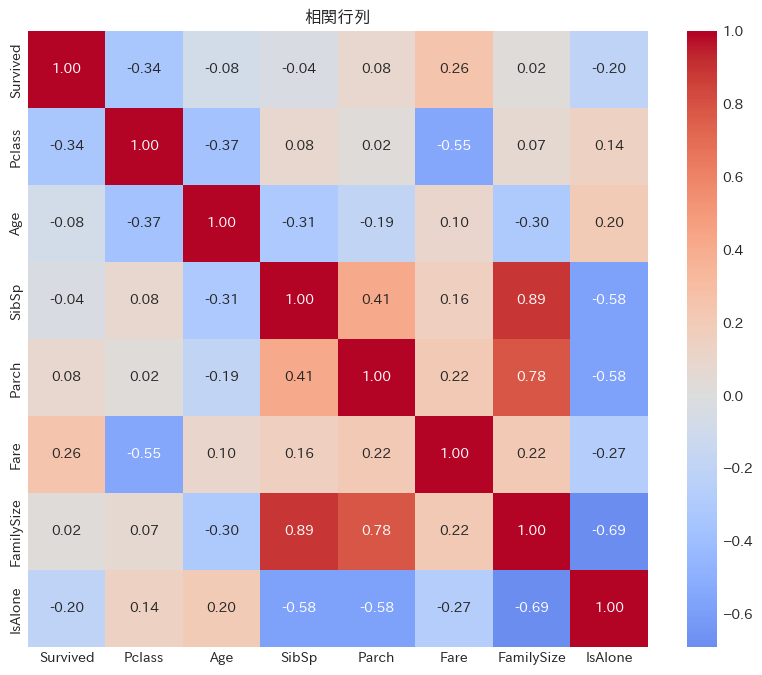

In [31]:
# 数値変数の相関行列
numerical_features = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize', 'IsAlone']
corr_matrix = train_df[numerical_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('相関行列')
plt.show()

## まとめ

### 重要な発見

1. **性別が生存率に大きく影響**
   - 女性の生存率が男性より圧倒的に高い

2. **チケットクラスも重要な要因**
   - 1等 > 2等 > 3等の順で生存率が高い

3. **年齢の影響**
   - 子供（特に10歳以下）の生存率が高い

4. **家族構成**
   - 小規模な家族（2-4人）の生存率が高い
   - 大家族や一人旅は生存率が低い

5. **欠損値**
   - Cabin（客室番号）は約77%が欠損
   - Age（年齢）は約20%が欠損
   - Embarked（乗船港）は2件のみ欠損

### 特徴量エンジニアリングの候補

- 称号（Mr., Mrs., Miss.など）の抽出
- 家族サイズのカテゴリ化
- 年齢層のビニング
- Cabin有無のフラグ
- 運賃のビニング